<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df=pd.read_csv('seeds_dataset.csv')
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0
1,12.13,13.73,5.394,3.745,5.220,0
2,14.86,14.67,5.678,3.258,5.351,0
3,15.69,14.75,5.527,3.514,5.046,0
4,19.94,16.92,6.675,3.763,6.550,1


In [3]:
df.shape

(199, 6)

In [4]:
df.isnull().sum() # there are no null values in the data

Area                0
Perimeter           0
Kernel_len          0
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

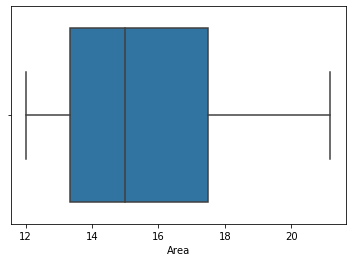

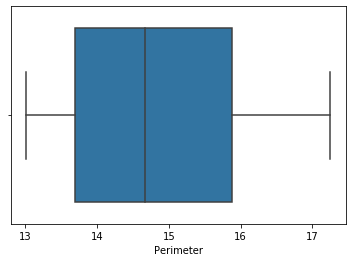

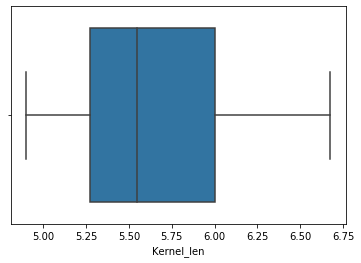

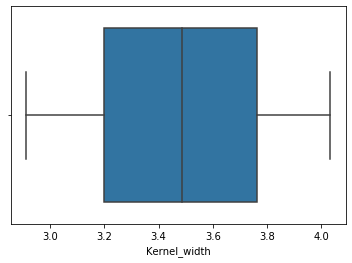

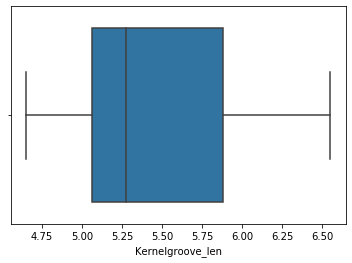

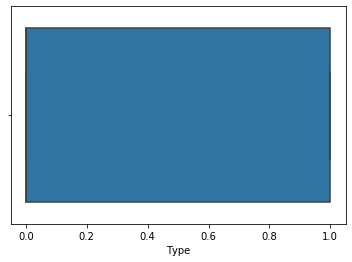

In [5]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Consider the train-test split in the ratio 70:30 with random state = 1.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,accuracy_score

y=df['Type']
x=df.drop('Type',axis=1)

dt=DecisionTreeClassifier(criterion='gini')
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
dt.fit(x_train,y_train)

y_test_pred=dt.predict(x_test)
y_test_prob=dt.predict_proba(x_test)[:,1]

cm=confusion_matrix(y_test,y_test_pred)
cm

array([[35,  4],
       [ 0, 21]], dtype=int64)

In [9]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

print("the number of correctly predicted test data is : ",TP+TN, "out of ", TP+FP+TN+FN)

the number of correctly predicted test data is :  56 out of  60


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot a decision tree for the model in the previous question and identify the seed type of the first observation in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
y=df['Type']
x=df.drop("Type",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
y_prob=dt.predict_proba(x_test)[:,1]

y_pred[0]


1

In [11]:
# Seed type of the first observation in the test set is Rosa wheat(1)

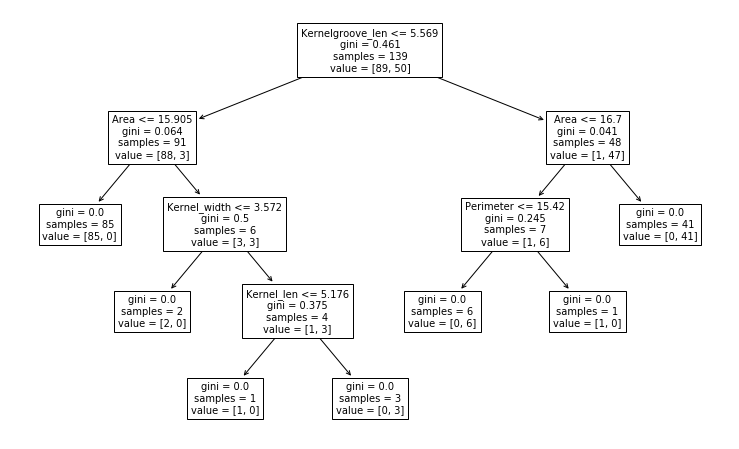

In [13]:
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(13,8))
a=plot_tree(dt,feature_names=x.columns)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Select the optimal number for decision trees from the given list of values to build a random forest using entropy criterion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

no_of_trees = [6, 8, 10, 12, 14, 16]

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

rfc=RandomForestClassifier()
params={'n_estimators':[6, 8, 10, 12, 14, 16],
       'criterion':['entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,cv=3,scoring='roc_auc',n_jobs=-1)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'n_estimators': [6, 8, 10, 12, 14, 16]},
                   scoring='roc_auc')

In [15]:
rsearch.best_params_

{'n_estimators': 12, 'criterion': 'entropy'}

In [17]:
print("optimum number of decision trees : ",12)

optimum number of decision trees :  12


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the most important variable in the random forest build with the optimal number of trees obtained in Q3
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
rfc=RandomForestClassifier(n_estimators=12)
rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=12)

In [19]:
pd.DataFrame(rfc.feature_importances_,index=x.columns,columns=['imp']).sort_values(by='imp',ascending=False)

,imp
Kernelgroove_len,0.471316
Perimeter,0.245795
Area,0.140247
Kernel_len,0.132926
Kernel_width,0.009716


In [20]:
# Kernelgroove_len is the most important variable as it has high feature_importance value

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which is the best criterion to build a decision tree for the given dataset?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
dt=DecisionTreeClassifier()
param={'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(dt,param_distributions=param,cv=3,scoring='roc_auc',n_jobs=-1)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy']},
                   scoring='roc_auc')

In [22]:
rsearch.best_params_

{'criterion': 'entropy'}

In [23]:
#entropy is the best criterion to build a decision tree for the given dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a random forest containing ten trees and compute the precision and sensitivity of the model from the confusion matrix 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
from sklearn.ensemble import RandomForestClassifier
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=3)
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)
y_prob=rfc.predict_proba(x_test)[:,1]

cm=confusion_matrix(y_test,y_pred)
cm


array([[40,  0],
       [ 1, 19]], dtype=int64)

In [40]:
TP=cm[1,1]
TN=cm[0,0]
FN=cm[1,0]
FP=cm[0,1]


precision=TP/(TP+FP)
sensitivity=TP/(FN+TP)

print("precision is : ",precision)
print("sensitivity is : ",sensitivity)

precision is :  1.0
sensitivity is :  0.95


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the optimal depth of the decision tree from the given list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth_values = [3, 5, 7, 9]

In [41]:
y=df['Type']
x=df.drop('Type',axis=1)
dt=DecisionTreeClassifier()
param={'max_depth':[3,5,7,9]}

gsearch=GridSearchCV(dt,param_grid=param,cv=3,scoring='roc_auc',n_jobs=-1)
gsearch.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9]}, scoring='roc_auc')

In [42]:
print("the optimal max_depth is : ",gsearch.best_params_['max_depth'])

the optimal max_depth is :  3


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build and plot a decision tree with maximum 5 terminal nodes (use the entropy criterion)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)

dt=DecisionTreeClassifier(max_leaf_nodes=5,criterion='entropy')
dt.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)

In [36]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
y=df['Type']
x=df.drop('Type',axis=1)

dot_data = export_graphviz(dt,out_file=None,feature_names=x.columns)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a random forest with entropy criterion such that each leaf node will contain at least three samples. Also calculate the f-1 score and accuracy of the model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)
rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=3)
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)
y_prob=rfc.predict_proba(x_test)

cm=confusion_matrix(y_test,y_pred)
cm

array([[36,  3],
       [ 0, 21]], dtype=int64)

In [46]:
TP=cm[1,1]
TN=cm[0,0]
FN=cm[1,0]
FP=cm[0,1]

precision =TP/(TP+FP)
recall=TP/(FN+TP)
f1_score=2/((1/precision)+(1/recall))

print("f1 score is : ",f1_score)
print("accuracy is : ", accuracy_score(y_test,y_pred))

f1 score is :  0.9333333333333333
accuracy is :  0.95


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Plot a decision tree with the optimal criterion such that it will contain no more than 4 terminal nodes and each terminal node will contain at least 5 observations  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
y=df['Type']
x=df.drop('Type',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_leaf_nodes=4,min_samples_leaf=5)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_prob=dt.predict_proba(x_test)

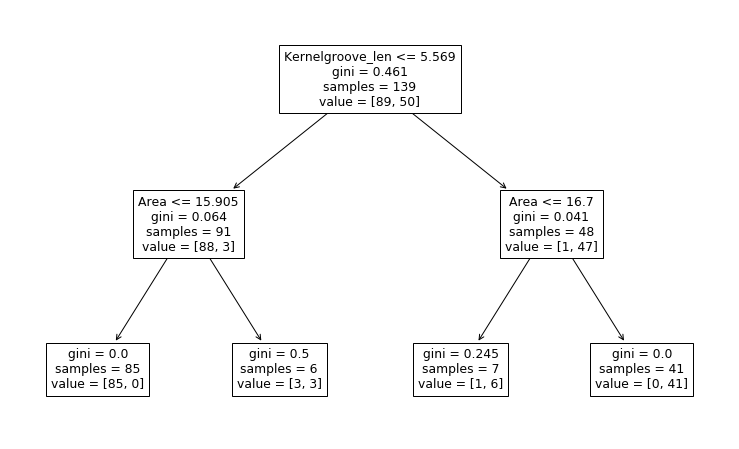

In [48]:
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(13,8))
a=plot_tree(dt,feature_names=x.columns)